In [1]:
from matplotlib import pyplot as plt
import h5py, tqdm, numpy as np

In [2]:
dataset = h5py.File('3dshapes.h5', 'r')
print(dataset.keys())
images = dataset['images']  # array shape [480000,64,64,3], uint8 in range(256)
labels = dataset['labels']  # array shape [480000,6], float64
image_shape = images.shape[1:]  # [64,64,3]
label_shape = labels.shape[1:]  # [6]
n_samples = labels.shape[0]  # 10*10*10*8*4*15=480000

_FACTORS_IN_ORDER = ['floor_hue', 'wall_hue', 'object_hue', 'scale', 'shape',
                     'orientation']
_NUM_VALUES_PER_FACTOR = {'floor_hue': 10, 'wall_hue': 10, 'object_hue': 10, 
                          'scale': 8, 'shape': 4, 'orientation': 15}

<KeysViewHDF5 ['images', 'labels']>


In [3]:
def get_index(factors):
  """ Converts factors to indices in range(num_data)
  Args:
    factors: np array shape [6,batch_size].
             factors[i]=factors[i,:] takes integer values in 
             range(_NUM_VALUES_PER_FACTOR[_FACTORS_IN_ORDER[i]]).

  Returns:
    indices: np array shape [batch_size].
  """
  indices = 0
  base = 1
  for factor, name in reversed(list(enumerate(_FACTORS_IN_ORDER))):
    indices += factors[factor] * base
    base *= _NUM_VALUES_PER_FACTOR[name]
  return indices

def show_images_grid(imgs_, num_images=36):
  ncols = int(np.ceil(num_images**0.5))
  nrows = int(np.ceil(num_images / ncols))
  _, axes = plt.subplots(ncols, nrows, figsize=(nrows * 3, ncols * 3))
  axes = axes.flatten()

  for ax_i, ax in enumerate(axes):
    if ax_i < num_images:
      ax.imshow(imgs_[ax_i], cmap='Greys_r', interpolation='nearest')
      ax.set_xticks([])
      ax.set_yticks([])
    else:
      ax.axis('off')

In [4]:
factors = np.zeros([len(_FACTORS_IN_ORDER), 480], dtype=np.int32)
print(factors.shape)

factors[0, :] = 7
factors[1, :] = 3
factors[2, :] = 0

idx = 0
for i in range(8):
    for j in range(4):
        for k in range(15):
            factors[3, idx] = i
            factors[4, idx] = j
            factors[5, idx] = k
            idx += 1

index = get_index(factors=factors)
ims = []
for ind in tqdm.tqdm(index):
    im = images[ind]
    im = np.asarray(im)
    ims.append(im)
ims = np.stack(ims, axis=0)
ims = ims/255.0
ims = ims.astype(np.float32)
ims.reshape([480, 64, 64, 3])
print(ims.shape)

(6, 480)


100%|██████████| 480/480 [02:02<00:00,  3.91it/s]

(480, 64, 64, 3)


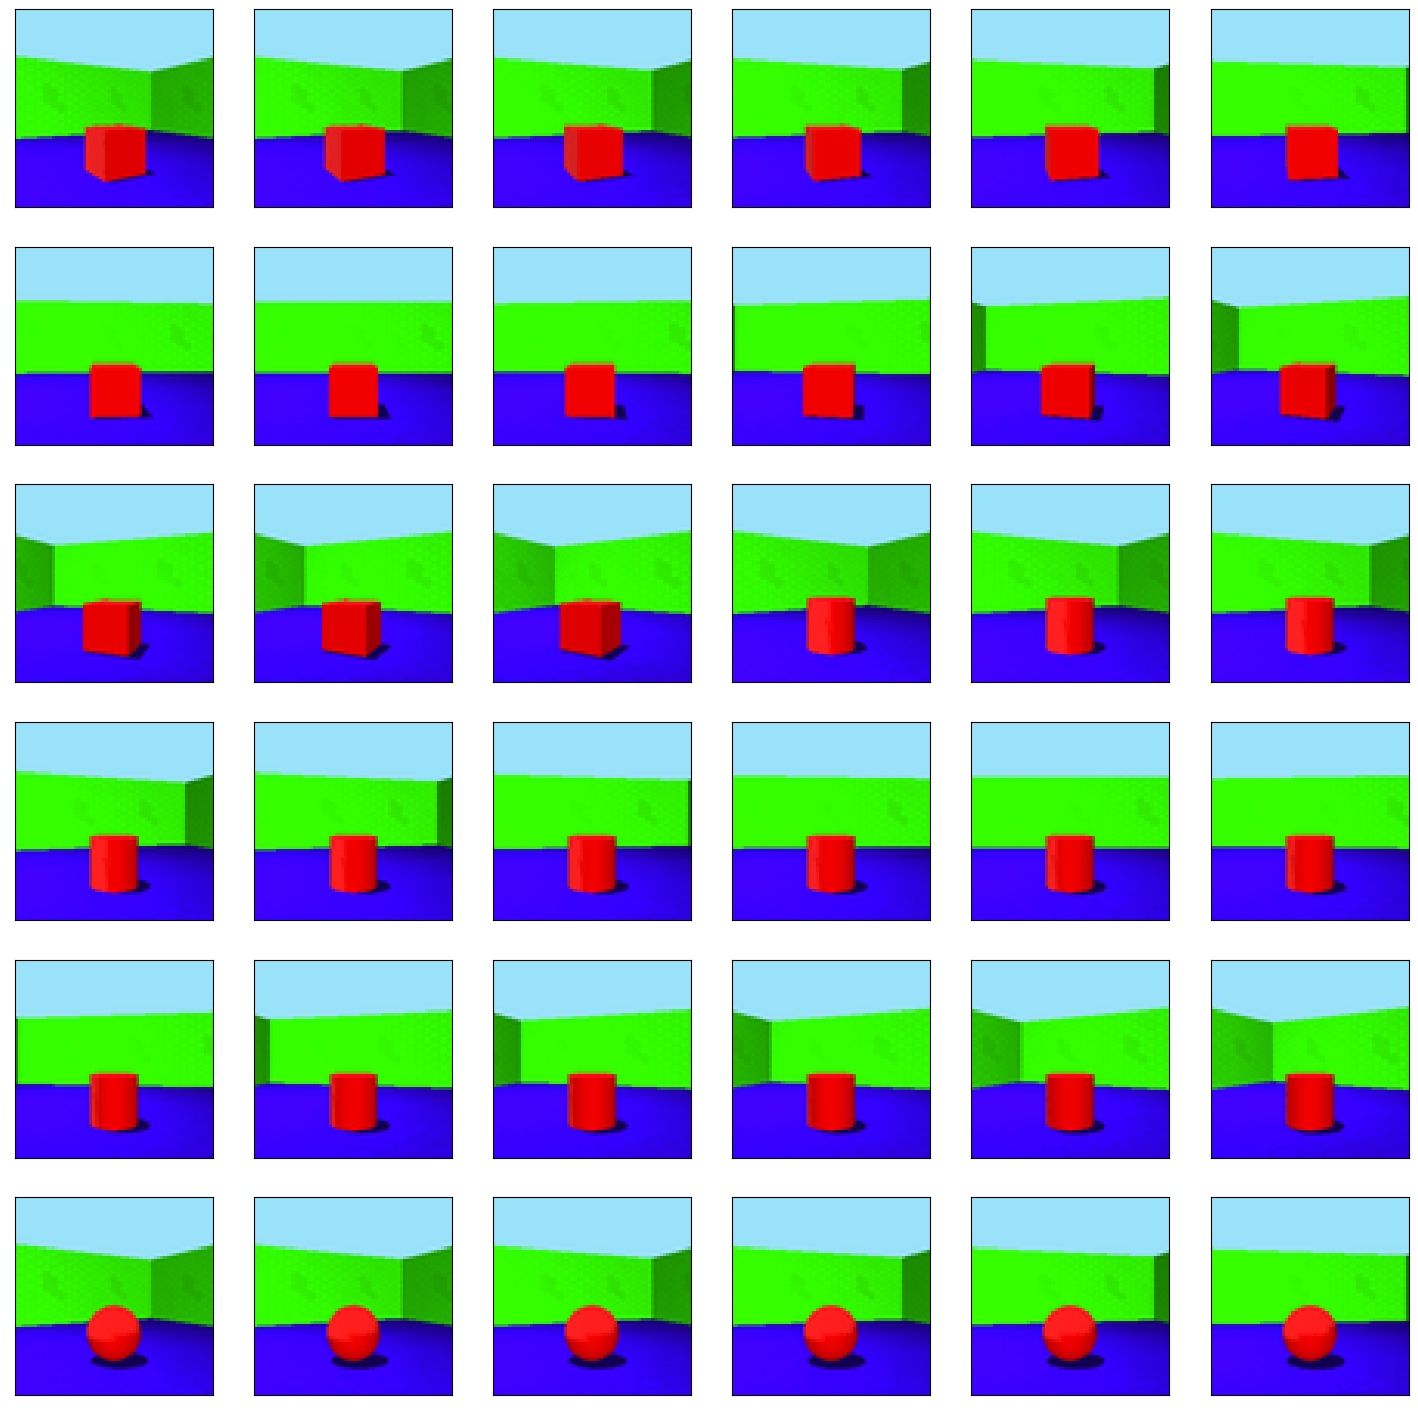

In [5]:
show_images_grid(ims)
np.save("3dshapesfiltered.npy", ims)
labels = factors[4, :]
np.save("3dshapeslabel.npy", labels)